In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import tifffile

In [4]:
N = 64
B = 100
n_labels = 40
labels_size = 50
max_noise = 8
offset = 50

def generator():
    while True:
        gt = offset*np.ones((N,N))
        p = np.zeros((N,N))

        l = rd.randint(0, n_labels)
        for i in range( l ):
            x = rd.randint(0, N)
            y = rd.randint(0, N)
            w = rd.randint(2, labels_size-i)
            h = rd.randint(2, labels_size-i)

            if x+w >= N:
                w = N-x
            if y+h >= N:
                h = N-y

            gt[x:x+w,y:y+h] = np.random.randint(255-offset)+offset

        n = np.random.randint(max_noise)
        
        noiseLvL = 2.0**((n-10))
        imageScaled=(gt-offset)*noiseLvL
        p=np.random.poisson(imageScaled)/noiseLvL+offset

        # normalise
        m = max(gt.max(), p.max())
    
        gt = np.floor( 255*gt/m )
        p = np.floor( 255*p/m )
    
        yield gt, p
    
    
def save_stack():
    gts = []
    p = []
    gen = generator()

    for i in range(B):
        im, pred = next(gen)
        
        gts.append(im)
        p.append(pred)
        
    gt_np = np.array(gts)
    p_np = np.array(p)
    
    np.save('data/gt', gt_np)
    np.save('data/pred', p_np)
    
    tifffile.imwrite('data/gt.tiff', gt_np)
    tifffile.imwrite('data/pred.tiff', p_np)

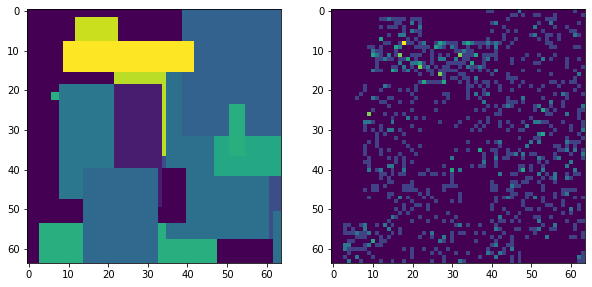

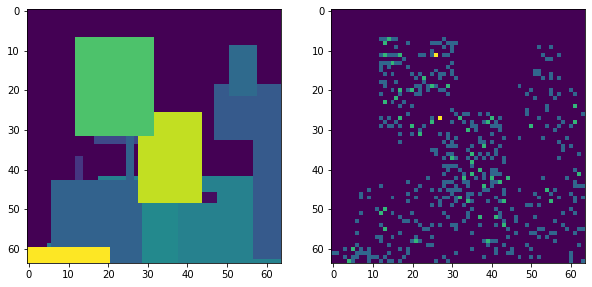

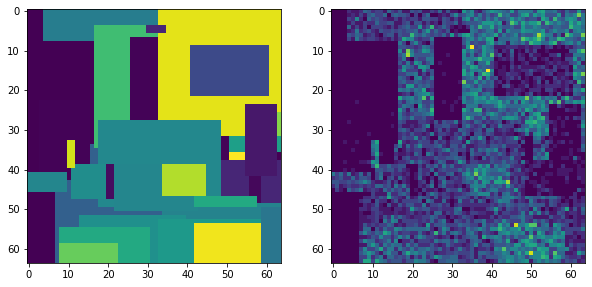

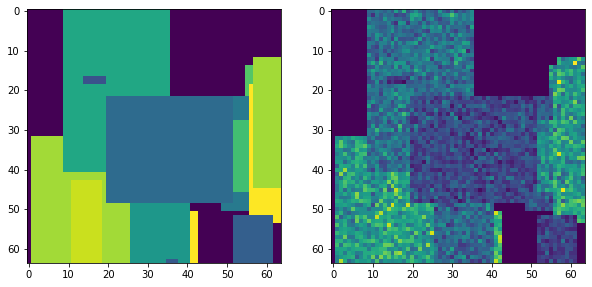

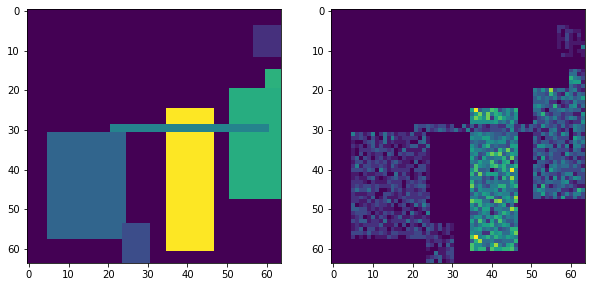

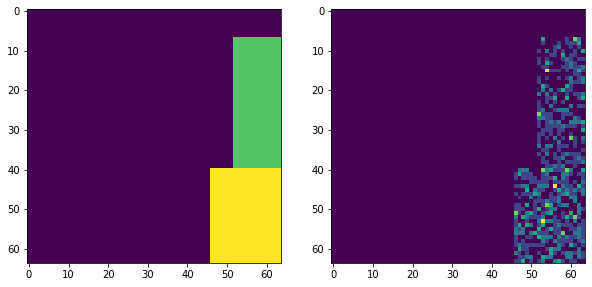

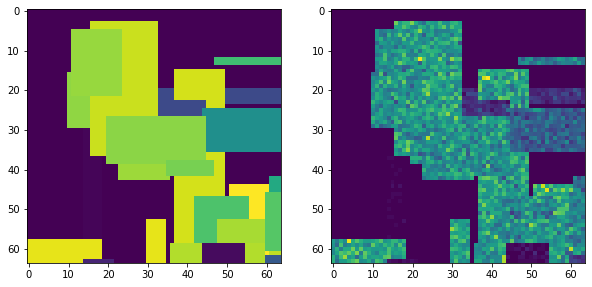

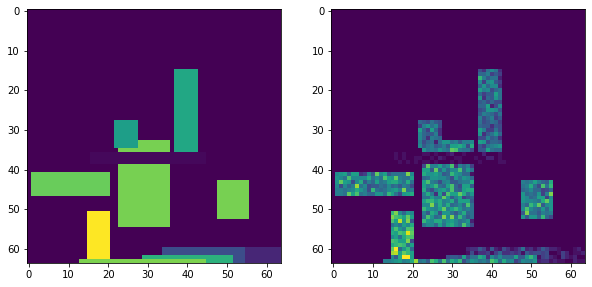

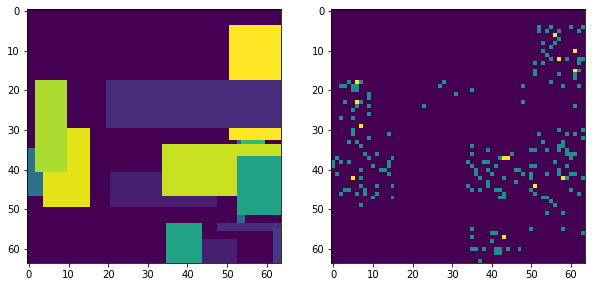

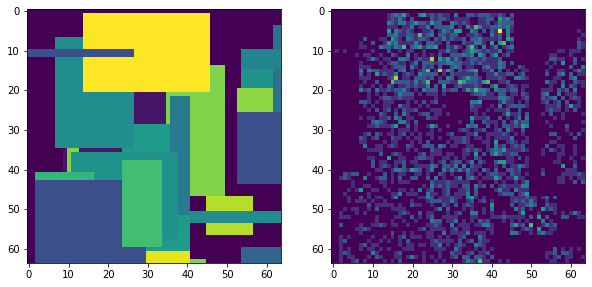

In [5]:
gen = generator()

for i in range(10):
    im, pred = next(gen)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.subplot(1,2,2)
    plt.imshow(pred)

In [6]:
save_stack()